Imports

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [103]:
folder = "\Archive_5"
#folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv").sort_index(axis=1)
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv").sort_index(axis=1)
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv").sort_index(axis=1)
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv").sort_index(axis=1)

Check dataframes

In [104]:
households

business_owner  c_excess_money       c_f       c_h  \
0                 0.0        0.299166  0.498332  0.199166   
1                 0.0        0.228466  0.356931  0.128466   
2                 0.0        0.342377  0.584755  0.242377   
3                 0.0        0.307816  0.515631  0.207816   
4                 0.0        0.283386  0.466772  0.183386   
...               ...             ...       ...       ...   
36995             0.0        0.291772  0.483544  0.191772   
36996             0.0        0.245856  0.391712  0.145856   
36997             0.0        0.316746  0.533493  0.216746   
36998             0.0        0.242451  0.384902  0.142451   
36999             0.0        0.387410  0.674819  0.287410   

       cash_on_hand_current  cash_on_hand_desired  cash_on_hand_real_desired  \
0                       0.0                   0.0                        0.0   
1                       0.0                   0.0                        0.0   
2                       0.0                   0.0                        0.0   
3                       0.0                   0.0                        0.0   
4                       0.0                   0.0                        0.0   
...                     ...                   ...                        ...   
36995                   0.0                 259.0                        0.0   
36996                   0.0                 151.0                        0.0   
36997                   0.0                 406.0                        0.0   
36998                   0.0                 227.0                        0.0   
36999                   0.0                 377.0                        0.0   

       consumption_propensity  date  expenditure_consumption  expenditure_tax  \
0                    0.378129   0.0                      0.0              0.0   
1                    0.668312   0.0                      0.0              0.0   
2                    0.427101   0.0                      0.0              0.0   
3                    0.500811   0.0                      0.0              0.0   
4                    0.400582   0.0                      0.0              0.0   
...                       ...   ...                      ...              ...   
36995                0.565731  36.0                   1085.0              0.0   
36996                0.604079  36.0                    887.0              0.0   
36997                0.533104  36.0                    875.0              0.0   
36998                0.327353  36.0                    712.0              0.0   
36999                0.510437  36.0                    934.0              0.0   

       income_average  income_current  income_firm_owner_dividend  \
0                 0.0             0.0                         0.0   
1                 0.0             0.0                         0.0   
2                 0.0             0.0                         0.0   
3                 0.0             0.0                         0.0   
4                 0.0             0.0                         0.0   
...               ...             ...                         ...   
36995          1352.0          1352.0                         0.0   
36996          1039.0          1039.0                         0.0   
36997          1284.0          1291.0                         0.0   
36998           939.0           942.0                         0.0   
36999          1315.0          1325.0                         0.0   

       income_gov_transfers  income_unemployment_benefit  income_wage  \
0                       0.0                          0.0          0.0   
1                       0.0                          0.0          0.0   
2                       0.0                          0.0          0.0   
3                       0.0                          0.0          0.0   
4                       0.0                          0.0          0.0   
...                     ...                          ...          ...   


In [105]:
cons_firms

Leverage_ratio  Total_assets  active_job_postings  average_profit  \
0                0.0       14197.0                 33.0             0.0   
1                0.0       11144.0                 27.0             0.0   
2                0.0       11646.0                 28.0             0.0   
3                0.0        9398.0                 23.0             0.0   
4                0.0       10111.0                 25.0             0.0   
...              ...           ...                  ...             ...   
1290             0.0       11616.0                  4.0         13225.0   
1291             0.0       11229.0                  0.0             0.0   
1292             0.0        9518.0                  1.0            -1.0   
1293             0.0       11367.0                 23.0         24921.0   
1294             0.0        9174.0                  0.0             0.0   

      average_sale_quantity  bankrupt  capital_costs  dash_on_hand  date  \
0                    4579.0       0.0            0.0  1.419700e+04   0.0   
1                    1652.0       0.0            0.0  1.114400e+04   0.0   
2                    1343.0       0.0            0.0  1.164600e+04   0.0   
3                    1378.0       0.0            0.0  9.398000e+03   0.0   
4                    3062.0       0.0            0.0  1.011100e+04   0.0   
...                     ...       ...            ...           ...   ...   
1290                 1359.0       1.0            0.0  1.540867e+09  36.0   
1291                    1.0       1.0            0.0  3.217655e+08  36.0   
1292                    7.0       1.0            0.0  6.214417e+08  36.0   
1293                 2271.0       1.0            0.0  1.031193e+09  36.0   
1294                    8.0       1.0            0.0  1.609627e+09  36.0   

      debt_interest_payments  debt_principal_payments  desired_empl_count  \
0               0.000000e+00             0.000000e+00                33.0   
1               0.000000e+00             0.000000e+00                27.0   
2               0.000000e+00             0.000000e+00                28.0   
3               0.000000e+00             0.000000e+00                23.0   
4               0.000000e+00             0.000000e+00                25.0   
...                      ...                      ...                 ...   
1290           -2.147484e+09            -6.410122e+08                 4.0   
1291            1.482794e+07             1.239089e+09                 0.0   
1292           -1.523460e+09             7.239992e+08                 1.0   
1293           -1.488948e+09             1.961926e+08                23.0   
1294           -2.083758e+09            -1.349577e+08                 0.0   

      desired_inventory  desired_inventory_factor  \
0                   0.0                  1.919730   
1                   0.0                  1.614470   
2                   0.0                  1.664640   
3                   0.0                  1.439860   
4                   0.0                  1.511200   
...                 ...                       ...   
1290              579.0                  0.920152   
1291               80.0                  0.874643   
1292              186.0                  1.224740   
1293            16758.0                  5.330180   
1294               15.0                  1.018260   

      desired_labor_capacity_utilization  desired_machines  dividend_payments  \
0                                    0.0               0.0                0.0   
1                                    0.0               0.0                0.0   
2                                    0.0               0.0                0.0   
3                                    0.0               0.0                0.0   
4                                    0.0               0.0                0.0   
...                                  ...               ...                ...   
1290                                 0.0               0.0     

In [106]:
cap_firms

Leverage_ratio  Total_assets  active_job_postings  average_profit  \
0               0.0       14197.0                 33.0             0.0   
1               0.0       11144.0                 27.0             0.0   
2               0.0       11646.0                 28.0             0.0   
3               0.0        9398.0                 23.0             0.0   
4               0.0       10111.0                 25.0             0.0   
..              ...           ...                  ...             ...   
180             0.0       11144.0                  0.0         14977.0   
181             0.0        9398.0                  0.0          3314.0   
182             0.0       14197.0                  0.0         11684.0   
183             0.0       10111.0                  0.0           557.0   
184             0.0       11646.0                  0.0          1182.0   

     average_sale_quantity  bankrupt  capital_costs  dash_on_hand  date  \
0                    241.0       0.0            0.0       14197.0   0.0   
1                    325.0       0.0            0.0       11144.0   0.0   
2                    312.0       0.0            0.0       11646.0   0.0   
3                    262.0       0.0            0.0        9398.0   0.0   
4                    330.0       0.0            0.0       10111.0   0.0   
..                     ...       ...            ...           ...   ...   
180                   43.0       0.0            0.0      429421.0  36.0   
181                   19.0       0.0            0.0      287705.0  36.0   
182                   26.0       0.0            0.0      385856.0  36.0   
183                    7.0       0.0            0.0      656277.0  36.0   
184                    6.0       0.0            0.0      442063.0  36.0   

     debt_interest_payments  debt_principal_payments  desired_empl_count  \
0                       0.0                      0.0                33.0   
1                       0.0                      0.0                27.0   
2                       0.0                      0.0                28.0   
3                       0.0                      0.0                23.0   
4                       0.0                      0.0                25.0   
..                      ...                      ...                 ...   
180                     0.0                      0.0                 0.0   
181                     0.0                      0.0                 0.0   
182                     0.0                      0.0                 0.0   
183                     0.0                      0.0                 0.0   
184                     0.0                      0.0                 0.0   

     desired_inventory  desired_inventory_factor  \
0                  0.0                  1.919730   
1                  0.0                  1.614470   
2                  0.0                  1.664640   
3                  0.0                  1.439860   
4                  0.0                  1.511200   
..                 ...                       ...   
180                0.0                  0.935251   
181                0.0                  2.654320   
182                0.0                  0.693048   
183                0.0                  1.292390   
184                0.0                  1.243150   

     desired_labor_capacity_utilization  desired_machines  dividend_payments  \
0                                   0.0               0.0                0.0   
1                                   0.0               0.0                0.0   
2                                   0.0               0.0                0.0   
3                                   0.0               0.0                0.0   
4                                   0.0               0.0                0.0   
..                                  ...               ...                ...   
180                                 0.0               0.0                0.0   
181                                 0

In [107]:
pboard.head()

average_wage_employed  average_wage_market  cap_firm_sentiment_percentage  \
0               0.000000             0.000000                            0.0   
1            1207.239990           947.585999                            1.0   
2            1176.829956           859.224976                            0.0   
3            1103.900024           891.421997                            0.0   
4            1115.579956          1057.739990                            0.0   

   cap_firm_sentiment_sum  cap_price_level_current  cap_price_level_previous  \
0                     0.0              1095.890015                  0.000000   
1                     5.0              1095.890015               1095.890015   
2                     0.0              1263.500000               1095.890015   
3                     0.0              1236.449951               1263.500000   
4                     0.0              1285.849976               1236.449951   

   capital_goods_production  capital_goods_production_planned  \
0                       0.0                               0.0   
1                    2502.0                            2600.0   
2                    1875.0                            1875.0   
3                    1404.0                            1404.0   
4                    1051.0                            1051.0   

   cons_firm_sentiment_percentage  cons_firm_sentiment_sum  \
0                        0.000000                      0.0   
1                        1.000000                     35.0   
2                        0.285714                     10.0   
3                        0.200000                      7.0   
4                        0.228571                      8.0   

   consumer_goods_production  consumer_goods_production_planned  \
0                        0.0                                0.0   
1                   173289.0                           176740.0   
2                   152215.0                           168715.0   
3                   137289.0                           155945.0   
4                   128356.0                           161141.0   

   consumer_orders  consumer_spending  consumption_budgets  date  \
0              0.0                0.0                  0.0   0.0   
1          94978.0           868069.0             872253.0   1.0   
2         104433.0           813851.0             817330.0   2.0   
3          84709.0           724632.0             728367.0   3.0   
4          74225.0           752227.0             756723.0   4.0   

   empl_contract_expiries  empl_firings  empl_hires  \
0                     0.0           0.0       733.0   
1                     0.0          94.0       251.0   
2                     0.0         159.0        95.0   
3                     0.0         270.0       180.0   
4                     0.0         246.0       297.0   

   household_sentiment_percentage  household_sentiment_sum  inflation_current  \
0                             0.0                      0.0            0.00000   
1                             0.0                    625.0            1.04489   
2                             0.0                    579.0            1.18258   
3                             0.0                    524.0            1.30782   
4                             0.0                    551.0            1.40701   

   machine_orders  machine_orders_planned  machine_spending  minimum_wage  \
0             0.0                     0.0               0.0         600.0   
1            55.0                    55.0           50389.0         600.0   
2            23.0                    23.0           23313.0         600.0   
3             0.0                     0.0               0.0         600.0   
4            60.0                    60.0           50887.0         600.0   

   n_employed  n_new_job_postings  n_removed_job_postings  n_unemployed  \
0         0.0                 0.0                     0.0           0.0   
1       890.0               897.0 

Get sums and averages for each timestep

In [108]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

In [109]:
households

business_owner  c_excess_money       c_f       c_h  \
0                 0.0        0.299166  0.498332  0.199166   
1                 0.0        0.228466  0.356931  0.128466   
2                 0.0        0.342377  0.584755  0.242377   
3                 0.0        0.307816  0.515631  0.207816   
4                 0.0        0.283386  0.466772  0.183386   
...               ...             ...       ...       ...   
36995             0.0        0.291772  0.483544  0.191772   
36996             0.0        0.245856  0.391712  0.145856   
36997             0.0        0.316746  0.533493  0.216746   
36998             0.0        0.242451  0.384902  0.142451   
36999             0.0        0.387410  0.674819  0.287410   

       cash_on_hand_current  cash_on_hand_desired  cash_on_hand_real_desired  \
0                       0.0                   0.0                        0.0   
1                       0.0                   0.0                        0.0   
2                       0.0                   0.0                        0.0   
3                       0.0                   0.0                        0.0   
4                       0.0                   0.0                        0.0   
...                     ...                   ...                        ...   
36995                   0.0                 259.0                        0.0   
36996                   0.0                 151.0                        0.0   
36997                   0.0                 406.0                        0.0   
36998                   0.0                 227.0                        0.0   
36999                   0.0                 377.0                        0.0   

       consumption_propensity  date  expenditure_consumption  expenditure_tax  \
0                    0.378129   0.0                      0.0              0.0   
1                    0.668312   0.0                      0.0              0.0   
2                    0.427101   0.0                      0.0              0.0   
3                    0.500811   0.0                      0.0              0.0   
4                    0.400582   0.0                      0.0              0.0   
...                       ...   ...                      ...              ...   
36995                0.565731  36.0                   1085.0              0.0   
36996                0.604079  36.0                    887.0              0.0   
36997                0.533104  36.0                    875.0              0.0   
36998                0.327353  36.0                    712.0              0.0   
36999                0.510437  36.0                    934.0              0.0   

       income_average  income_current  income_firm_owner_dividend  \
0                 0.0             0.0                         0.0   
1                 0.0             0.0                         0.0   
2                 0.0             0.0                         0.0   
3                 0.0             0.0                         0.0   
4                 0.0             0.0                         0.0   
...               ...             ...                         ...   
36995          1352.0          1352.0                         0.0   
36996          1039.0          1039.0                         0.0   
36997          1284.0          1291.0                         0.0   
36998           939.0           942.0                         0.0   
36999          1315.0          1325.0                         0.0   

       income_gov_transfers  income_unemployment_benefit  income_wage  \
0                       0.0                          0.0          0.0   
1                       0.0                          0.0          0.0   
2                       0.0                          0.0          0.0   
3                       0.0                          0.0          0.0   
4                       0.0                          0.0          0.0   
...                     ...                          ...          ...   


Calculate number of agents

In [110]:
timestep = int(households['date'].max())
#timestep = 15
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

In [111]:
n_households

1000.0

## Plot the data

In [129]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


def plot_histogram(df, times, cols):
    # Plot histogram of each column at each of the times specified
    for col in cols:
        fig, axs = plt.subplots(nrows=1, ncols=len(times), figsize=(15, 5))
        for i, time in enumerate(times):

            axs[i].hist(df[df['date'] == time][col], bins=25)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
            axs[i].set_title(f'Distr of {col} at t={time}')
        plt.tight_layout()
        plt.show()


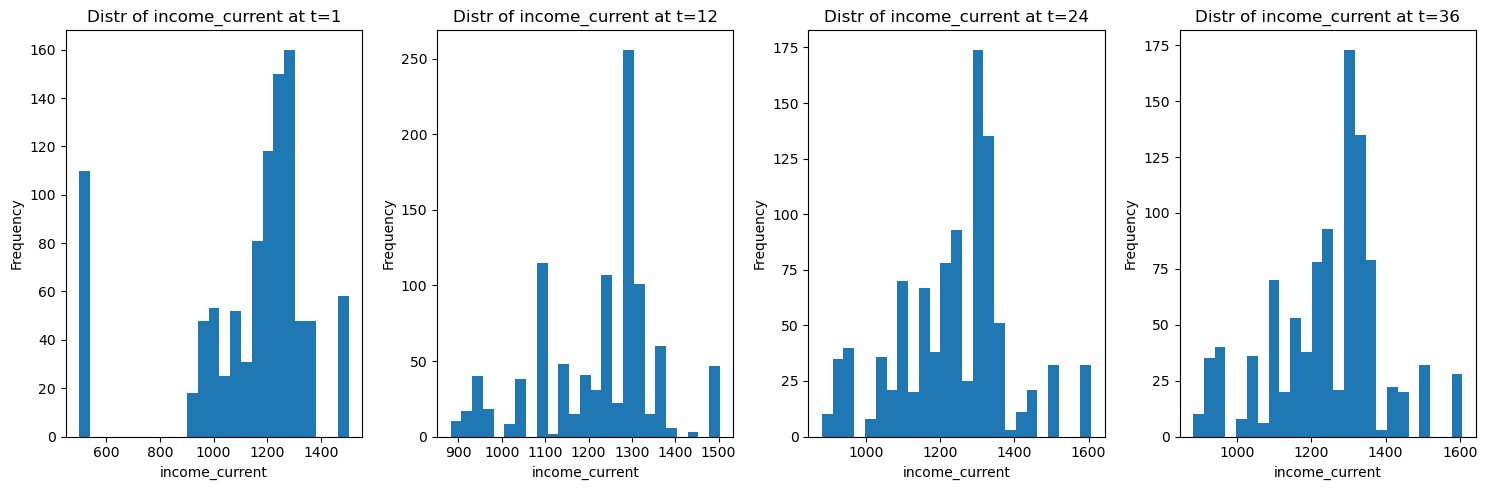

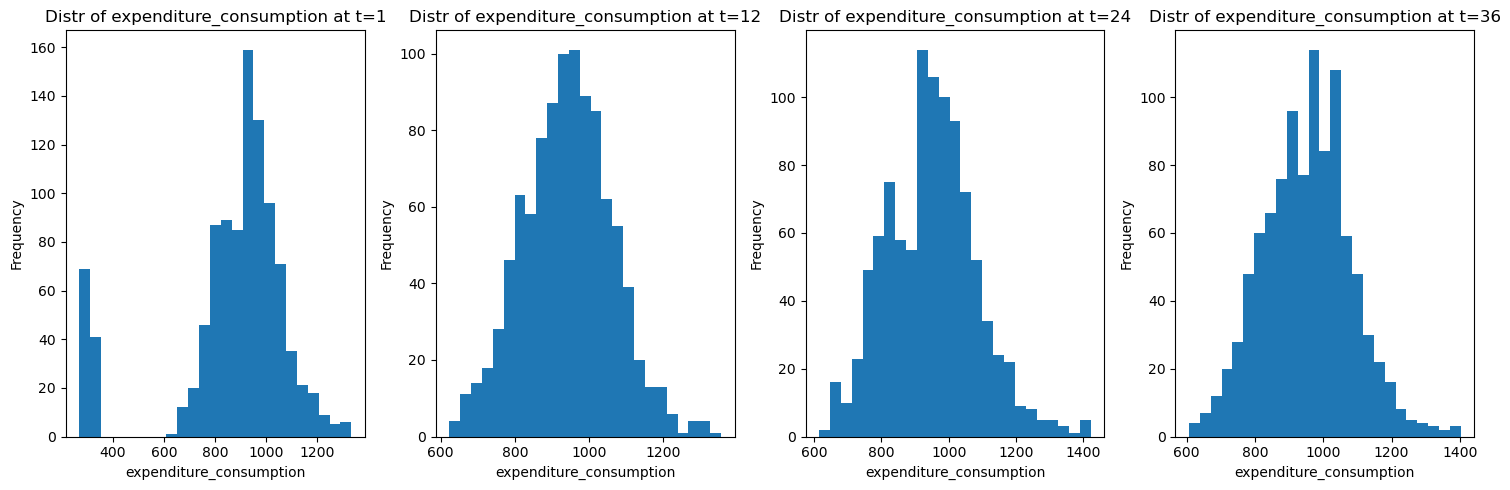

In [132]:
plot_histogram(households, [1, 12, 24, 36], [ 'income_current', "expenditure_consumption"])

### Plot Households

In [113]:
households

business_owner  c_excess_money       c_f       c_h  \
0                 0.0        0.299166  0.498332  0.199166   
1                 0.0        0.228466  0.356931  0.128466   
2                 0.0        0.342377  0.584755  0.242377   
3                 0.0        0.307816  0.515631  0.207816   
4                 0.0        0.283386  0.466772  0.183386   
...               ...             ...       ...       ...   
36995             0.0        0.291772  0.483544  0.191772   
36996             0.0        0.245856  0.391712  0.145856   
36997             0.0        0.316746  0.533493  0.216746   
36998             0.0        0.242451  0.384902  0.142451   
36999             0.0        0.387410  0.674819  0.287410   

       cash_on_hand_current  cash_on_hand_desired  cash_on_hand_real_desired  \
0                       0.0                   0.0                        0.0   
1                       0.0                   0.0                        0.0   
2                       0.0                   0.0                        0.0   
3                       0.0                   0.0                        0.0   
4                       0.0                   0.0                        0.0   
...                     ...                   ...                        ...   
36995                   0.0                 259.0                        0.0   
36996                   0.0                 151.0                        0.0   
36997                   0.0                 406.0                        0.0   
36998                   0.0                 227.0                        0.0   
36999                   0.0                 377.0                        0.0   

       consumption_propensity  date  expenditure_consumption  expenditure_tax  \
0                    0.378129   0.0                      0.0              0.0   
1                    0.668312   0.0                      0.0              0.0   
2                    0.427101   0.0                      0.0              0.0   
3                    0.500811   0.0                      0.0              0.0   
4                    0.400582   0.0                      0.0              0.0   
...                       ...   ...                      ...              ...   
36995                0.565731  36.0                   1085.0              0.0   
36996                0.604079  36.0                    887.0              0.0   
36997                0.533104  36.0                    875.0              0.0   
36998                0.327353  36.0                    712.0              0.0   
36999                0.510437  36.0                    934.0              0.0   

       income_average  income_current  income_firm_owner_dividend  \
0                 0.0             0.0                         0.0   
1                 0.0             0.0                         0.0   
2                 0.0             0.0                         0.0   
3                 0.0             0.0                         0.0   
4                 0.0             0.0                         0.0   
...               ...             ...                         ...   
36995          1352.0          1352.0                         0.0   
36996          1039.0          1039.0                         0.0   
36997          1284.0          1291.0                         0.0   
36998           939.0           942.0                         0.0   
36999          1315.0          1325.0                         0.0   

       income_gov_transfers  income_unemployment_benefit  income_wage  \
0                       0.0                          0.0          0.0   
1                       0.0                          0.0          0.0   
2                       0.0                          0.0          0.0   
3                       0.0                          0.0          0.0   
4                       0.0                          0.0          0.0   
...                     ...                          ...          ...   


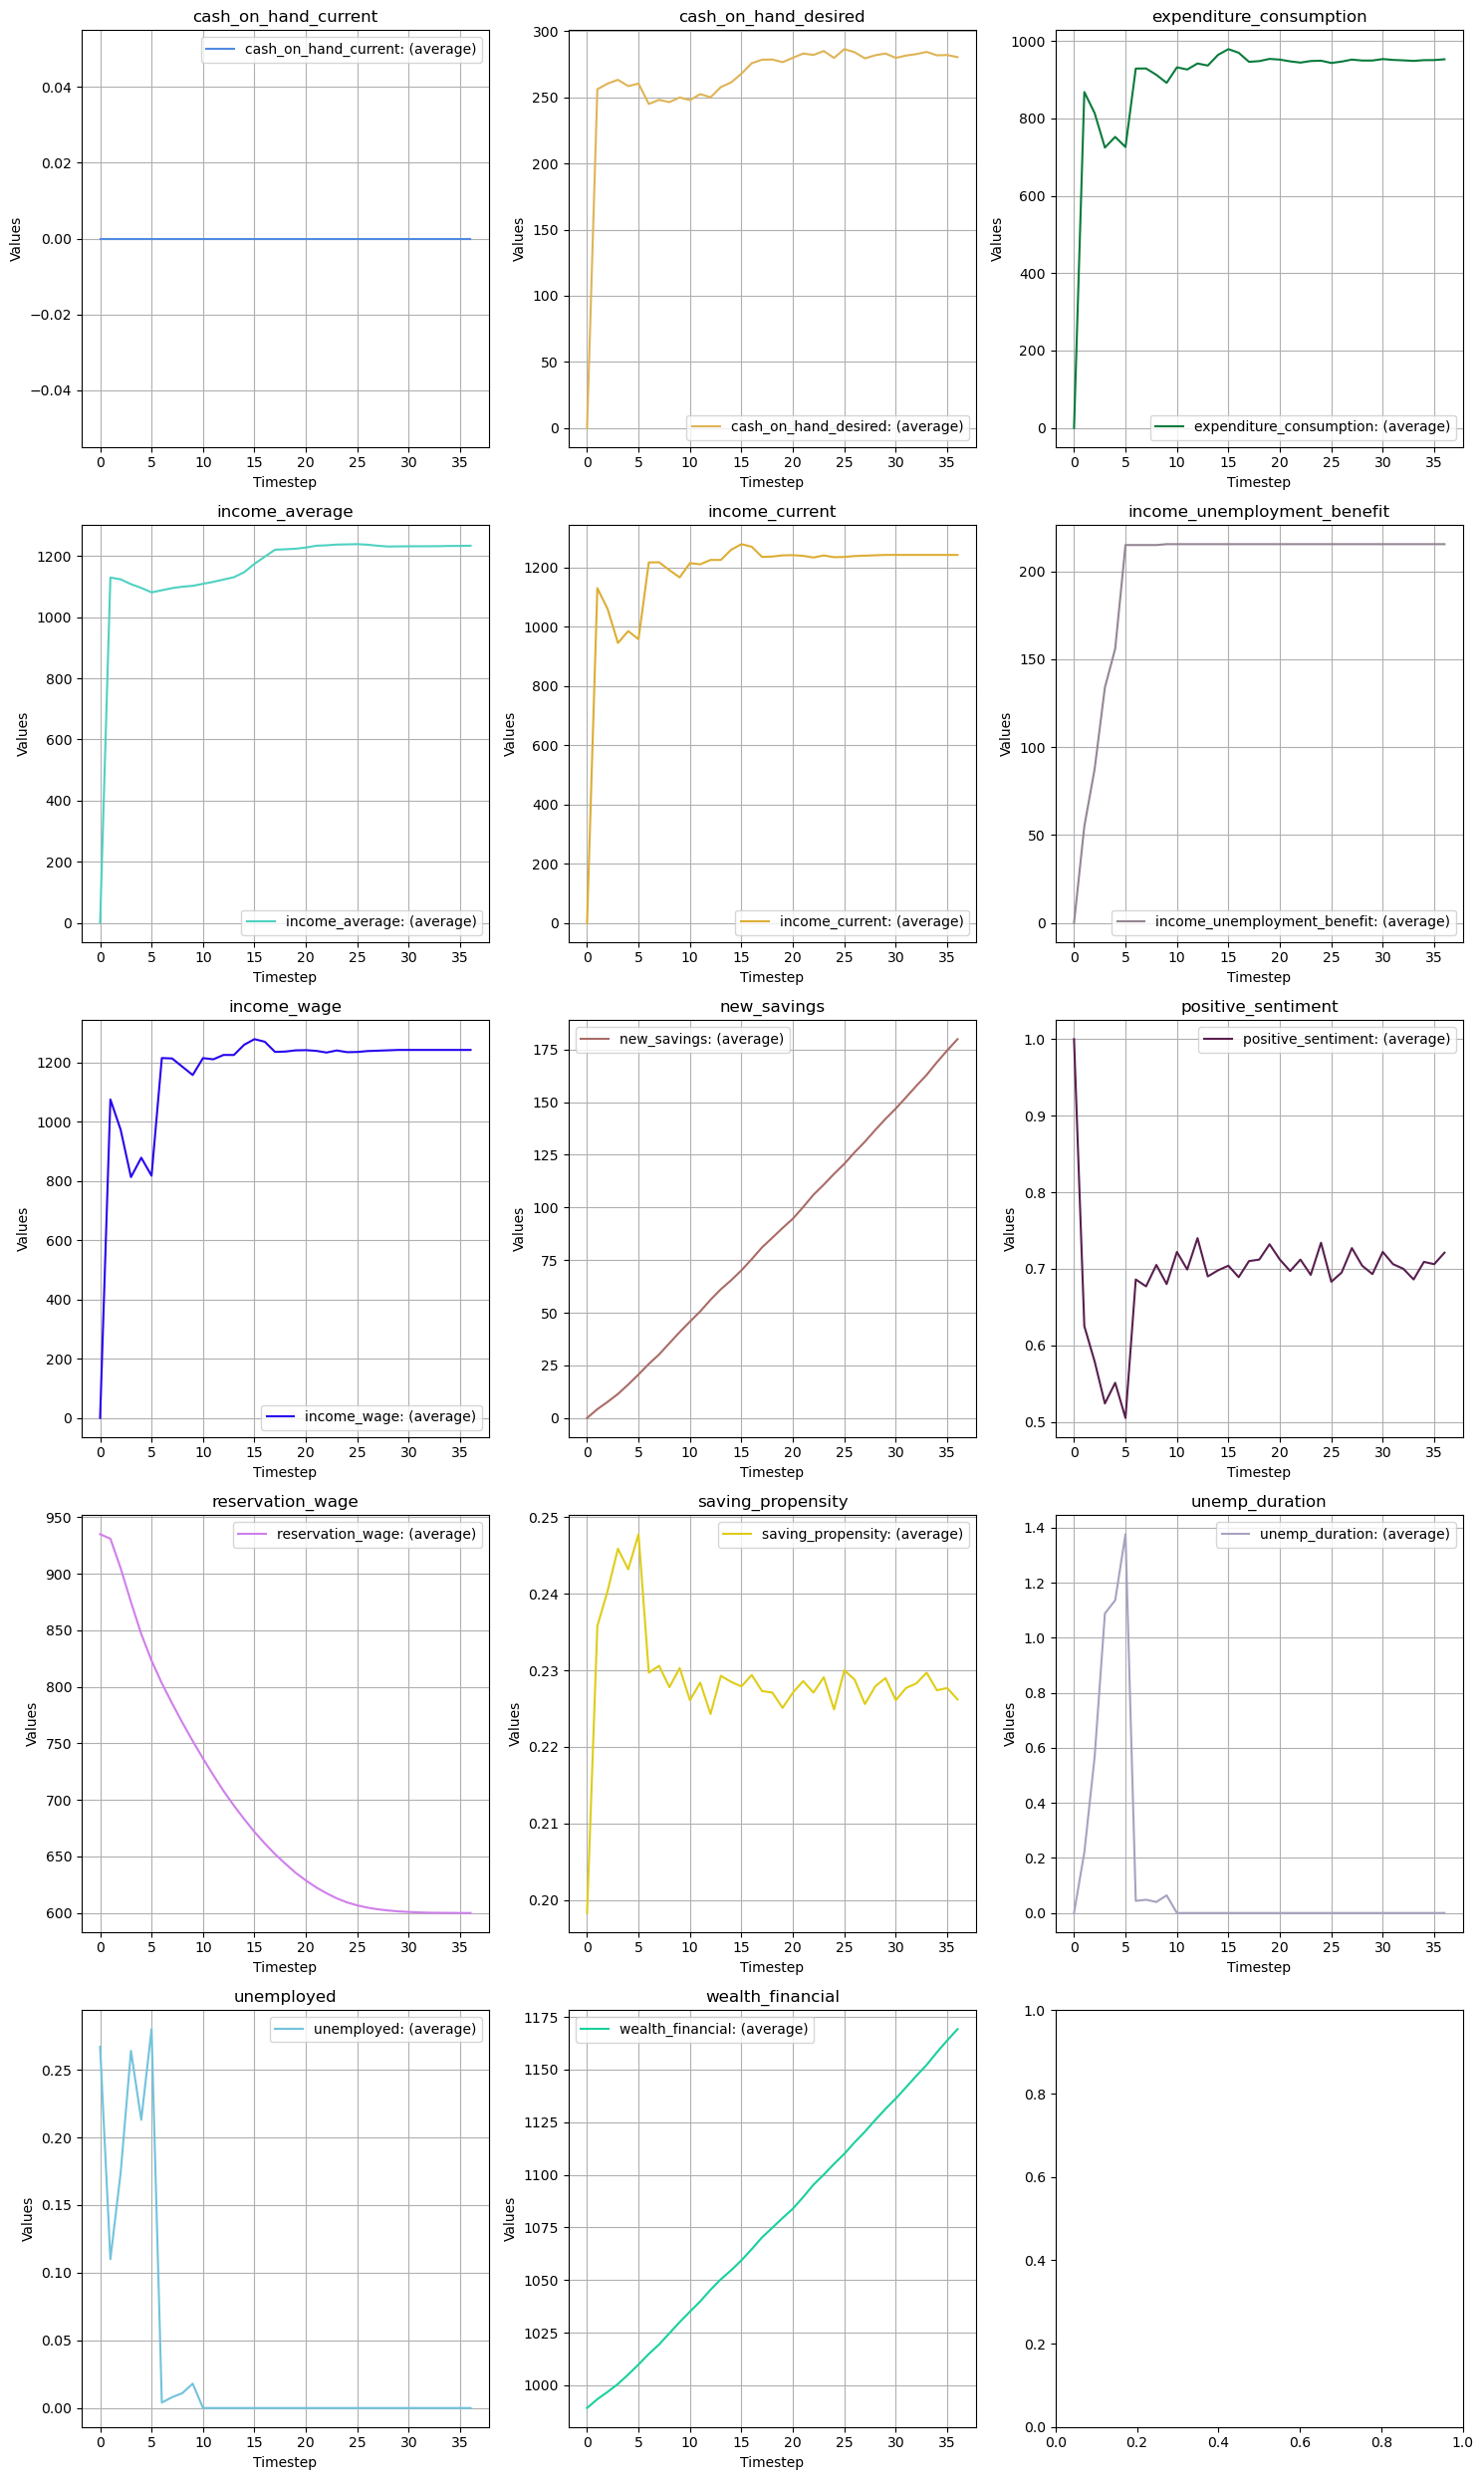

In [114]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_h", "c_excess_money", "wealth_human", "consumption_propensity","income_gov_transfers", "income_firm_owner_dividend", 
                   "expenditure_tax", "business_owner","cash_on_hand_real_desired",
                   "saving_propensity_optimist", "saving_propensity_pessimist", "p_majority_op_adoption", "unemp_duration_upper_bound"] 
plot_values(households_avg,t,True, cols_to_exclude)

###  Plot firms

In [115]:
cols_to_exclude = ['date',"subsidies", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic", "production_past",
                   "is_cons_firm", "inventory_reaction_factor", "desired_labor_capacity_utilization"]

#### Plot Consumer Firms

------ Plotting consumer firms -----


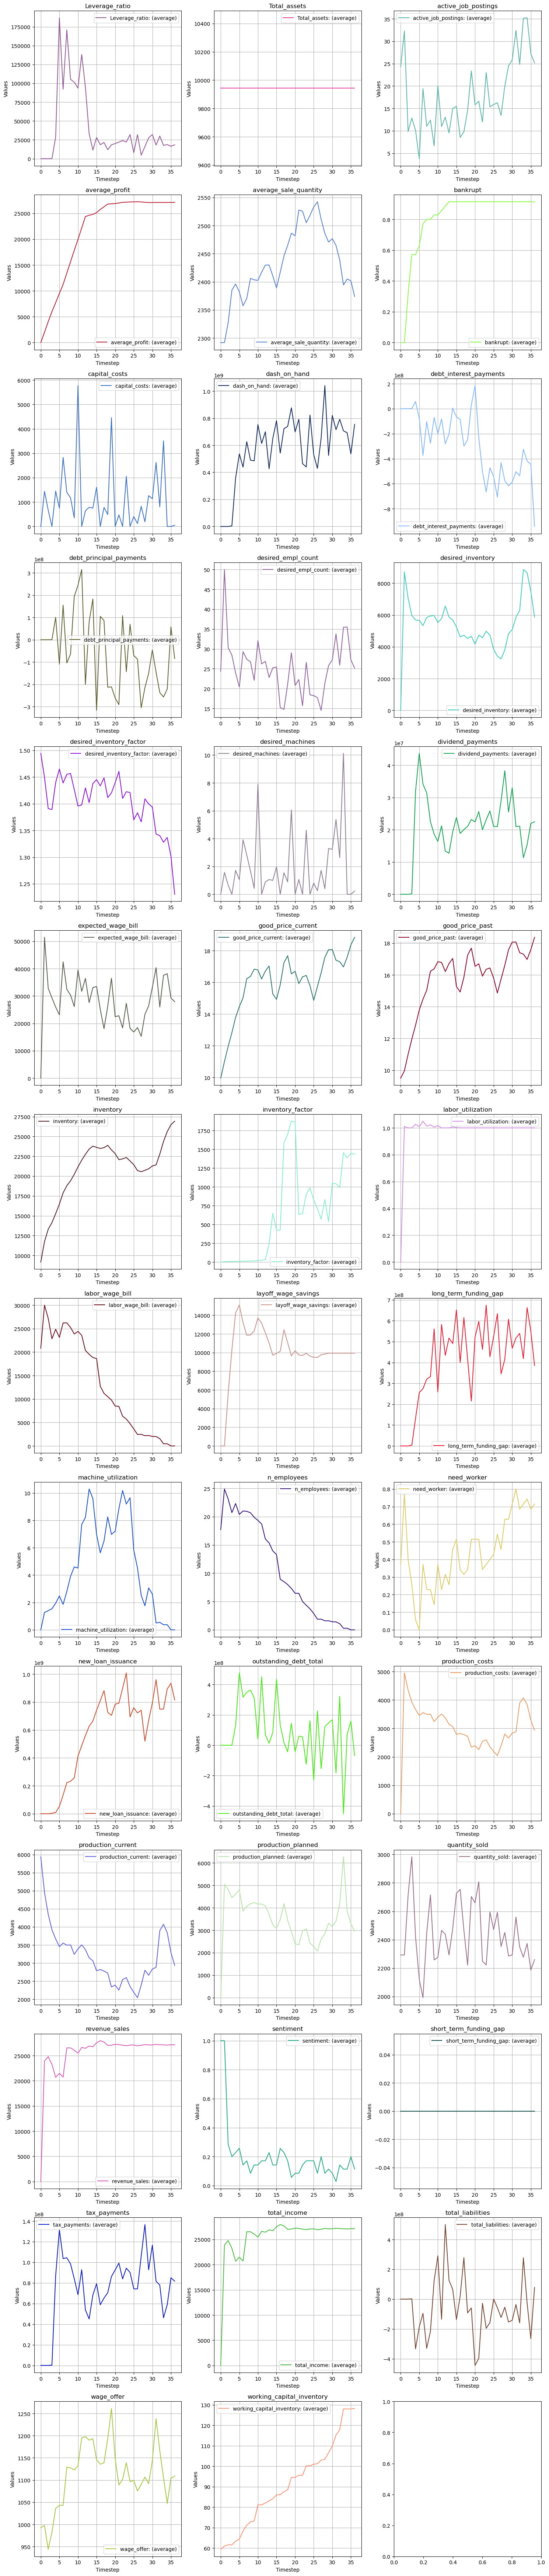

In [116]:
print("------ Plotting consumer firms -----")
#plot_values(cons_firms_sum,t,False, cols_to_exclude)

plot_values(cons_firms_avg,t,True, cols_to_exclude)

#### Histogram for Consumer Firms

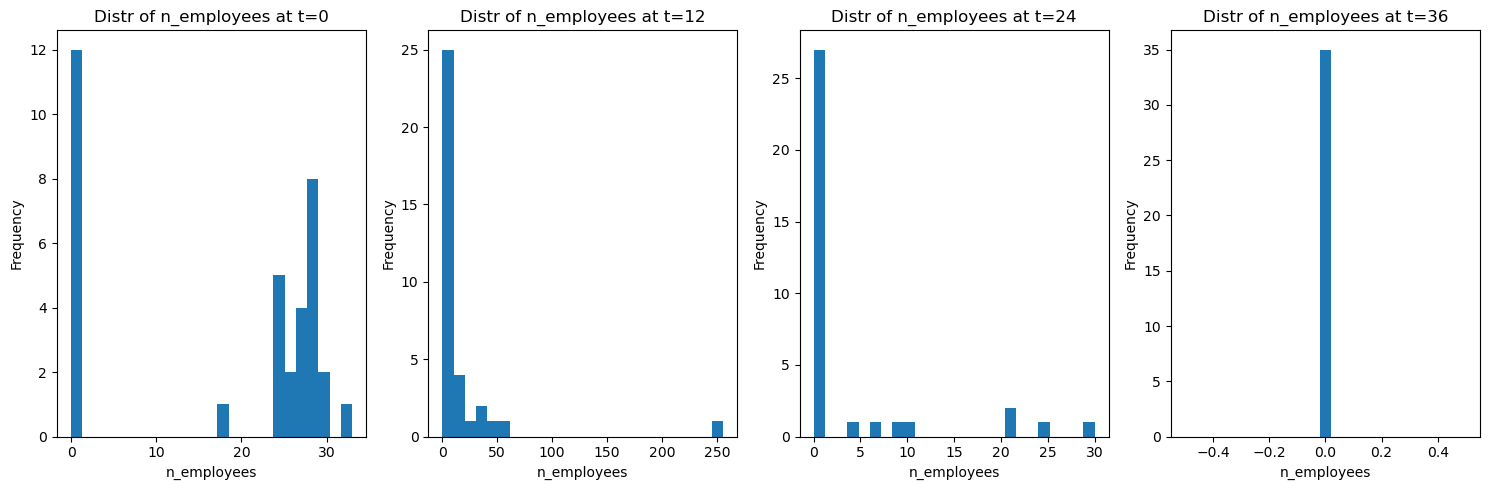

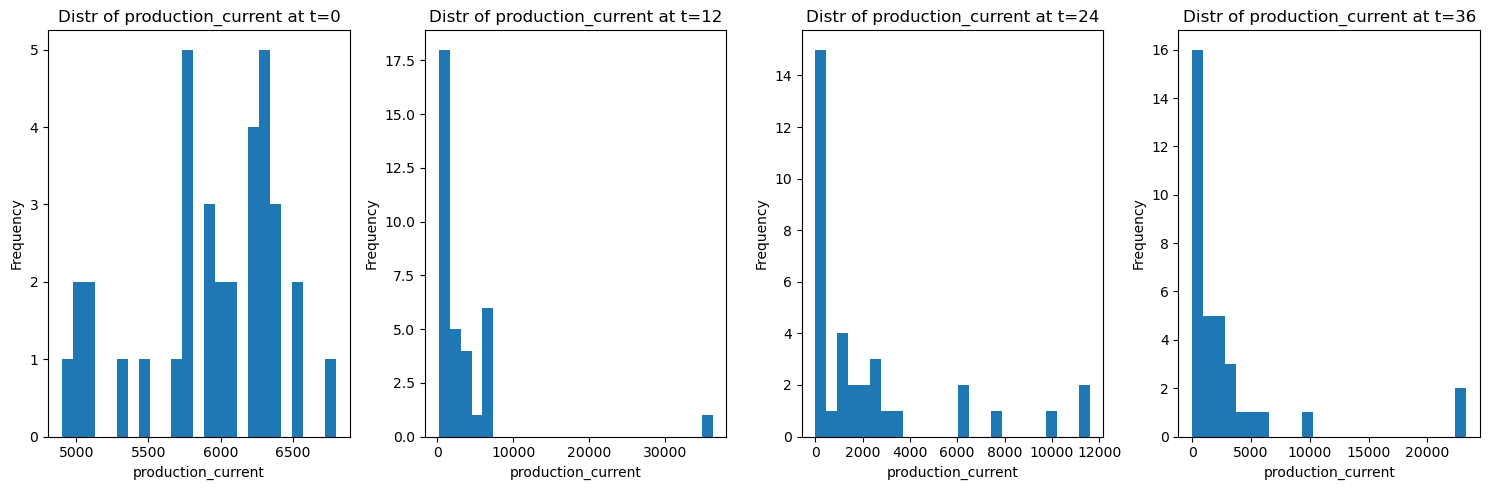

In [135]:
plot_histogram(cons_firms, [0, 12, 24, 36], [ 'n_employees', 'production_current'])

### Capital Firms

------ Plotting capital firms -----


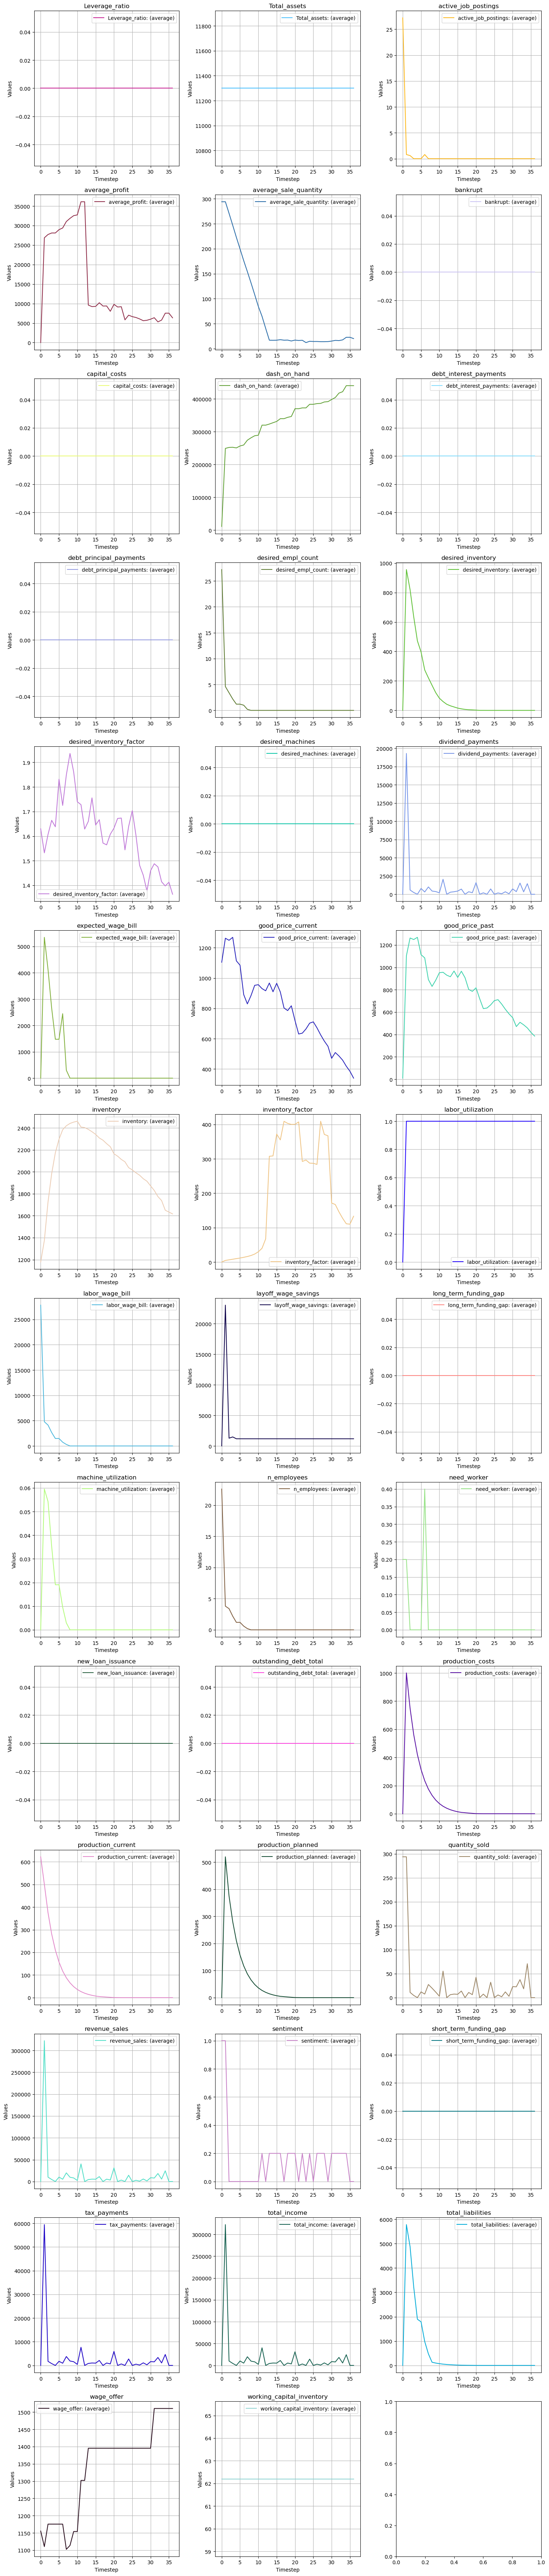

In [117]:
print("------ Plotting capital firms -----")
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

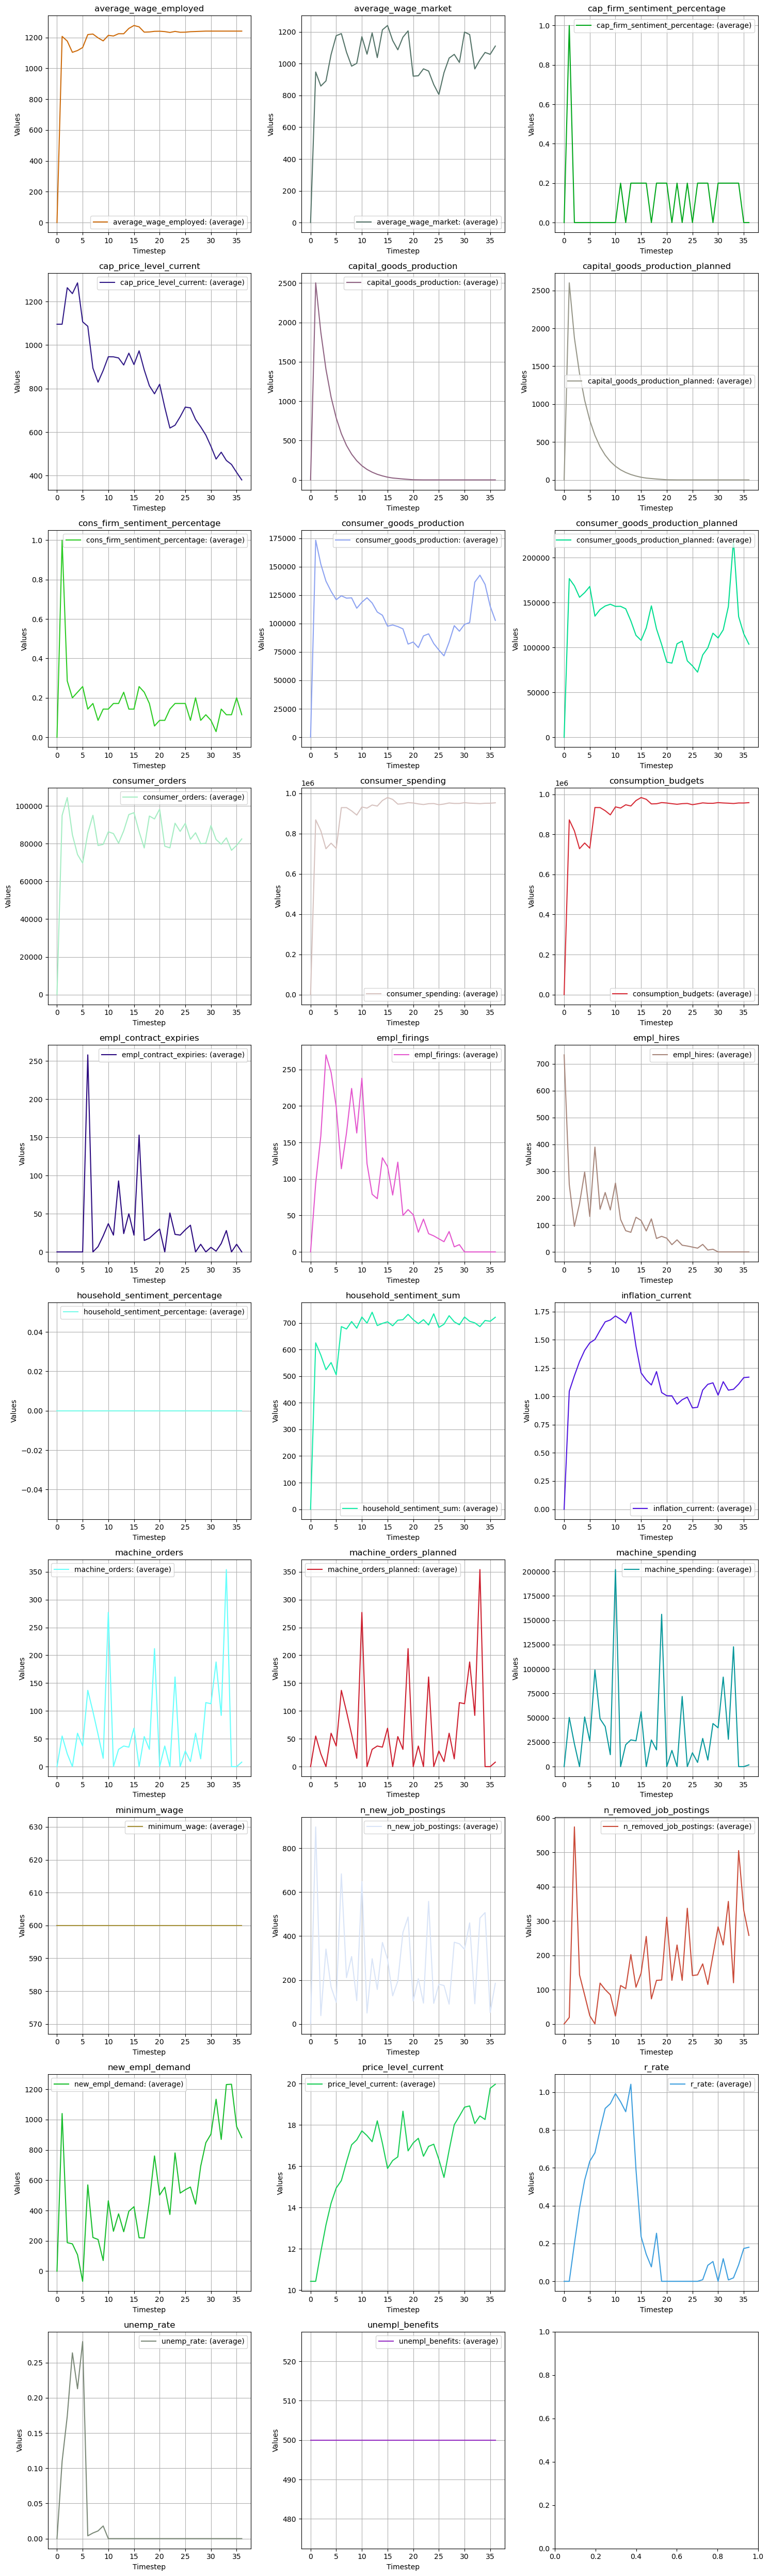

In [118]:
cols_to_exclude = ['date', "price_level_previous","cap_price_level_previous","n_employed", "n_unemployed", "cap_firm_sentiment_sum", 
                "cons_firm_sentiment_sum"]
plot_values(pboard,t,True, cols_to_exclude)

To do: